# Import the packages

In [1]:
import pipeline as pi
from tifffile import imread,imwrite
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
from placozoan.func_segmentation import segmentation_chanvese,get_holes_mask,segmentation_otsu
from placozoan.base_features import SingleObjectFeatures

# Preprocessing

## Steps:
    
    - Increase the contrast of the image 
    - Segmenting the algae plane per plane
    - Removing them from background

In [2]:
start = time.time()

In [3]:
preprocessed,alg_mask = pi.preprocessing('../data/tricho_wound.tif')

Presegmenting ...
--------------------------------------------------------------
0.00 % done ...
0.10 % done ...
0.19 % done ...
0.29 % done ...
0.38 % done ...
0.48 % done ...
0.58 % done ...
0.67 % done ...
0.77 % done ...
0.87 % done ...
0.96 % done ...
1.06 % done ...
1.15 % done ...
1.25 % done ...
1.35 % done ...
1.44 % done ...
1.54 % done ...
1.64 % done ...
1.73 % done ...
1.83 % done ...
1.92 % done ...
2.02 % done ...
2.12 % done ...
2.21 % done ...
2.31 % done ...
2.41 % done ...
2.50 % done ...
2.60 % done ...
2.69 % done ...
2.79 % done ...
2.89 % done ...
2.98 % done ...
3.08 % done ...
3.18 % done ...
3.27 % done ...
3.37 % done ...
3.46 % done ...
3.56 % done ...
3.66 % done ...
3.75 % done ...
3.85 % done ...
3.95 % done ...
4.04 % done ...
4.14 % done ...
4.23 % done ...
4.33 % done ...
4.43 % done ...
4.52 % done ...
4.62 % done ...
4.72 % done ...
4.81 % done ...
4.91 % done ...
5.00 % done ...
5.10 % done ...
5.20 % done ...
5.29 % done ...
5.39 % done ...
5.49 % 

46.68 % done ...
46.78 % done ...
46.87 % done ...
46.97 % done ...
47.06 % done ...
47.16 % done ...
47.26 % done ...
47.35 % done ...
47.45 % done ...
47.55 % done ...
47.64 % done ...
47.74 % done ...
47.83 % done ...
47.93 % done ...
48.03 % done ...
48.12 % done ...
48.22 % done ...
48.32 % done ...
48.41 % done ...
48.51 % done ...
48.60 % done ...
48.70 % done ...
48.80 % done ...
48.89 % done ...
48.99 % done ...
49.09 % done ...
49.18 % done ...
49.28 % done ...
49.37 % done ...
49.47 % done ...
49.57 % done ...
49.66 % done ...
49.76 % done ...
49.86 % done ...
49.95 % done ...
50.05 % done ...
50.14 % done ...
50.24 % done ...
50.34 % done ...
50.43 % done ...
50.53 % done ...
50.63 % done ...
50.72 % done ...
50.82 % done ...
50.91 % done ...
51.01 % done ...
51.11 % done ...
51.20 % done ...
51.30 % done ...
51.40 % done ...
51.49 % done ...
51.59 % done ...
51.68 % done ...
51.78 % done ...
51.88 % done ...
51.97 % done ...
52.07 % done ...
52.17 % done ...
52.26 % done .

93.26 % done ...
93.36 % done ...
93.46 % done ...
93.55 % done ...
93.65 % done ...
93.74 % done ...
93.84 % done ...
93.94 % done ...
94.03 % done ...
94.13 % done ...
94.23 % done ...
94.32 % done ...
94.42 % done ...
94.51 % done ...
94.61 % done ...
94.71 % done ...
94.80 % done ...
94.90 % done ...
95.00 % done ...
95.09 % done ...
95.19 % done ...
95.28 % done ...
95.38 % done ...
95.48 % done ...
95.57 % done ...
95.67 % done ...
95.77 % done ...
95.86 % done ...
95.96 % done ...
96.05 % done ...
96.15 % done ...
96.25 % done ...
96.34 % done ...
96.44 % done ...
96.54 % done ...
96.63 % done ...
96.73 % done ...
96.82 % done ...
96.92 % done ...
97.02 % done ...
97.11 % done ...
97.21 % done ...
97.31 % done ...
97.40 % done ...
97.50 % done ...
97.59 % done ...
97.69 % done ...
97.79 % done ...
97.88 % done ...
97.98 % done ...
98.08 % done ...
98.17 % done ...
98.27 % done ...
98.36 % done ...
98.46 % done ...
98.56 % done ...
98.65 % done ...
98.75 % done ...
98.85 % done .

# Drift computation

## Steps:

### Computing the drift between each plane

In [4]:
dx, dy = pi.global_drift(alg_mask)

0.00 % done ...
0.10 % done ...
0.19 % done ...
0.29 % done ...
0.38 % done ...
0.48 % done ...
0.58 % done ...
0.67 % done ...
0.77 % done ...
0.87 % done ...
0.96 % done ...
1.06 % done ...
1.15 % done ...
1.25 % done ...
1.35 % done ...
1.44 % done ...
1.54 % done ...
1.64 % done ...
1.73 % done ...
1.83 % done ...
1.92 % done ...
2.02 % done ...
2.12 % done ...
2.21 % done ...
2.31 % done ...
2.41 % done ...
2.50 % done ...
2.60 % done ...
2.69 % done ...
2.79 % done ...
2.89 % done ...
2.98 % done ...
3.08 % done ...
3.18 % done ...
3.27 % done ...
3.37 % done ...
3.46 % done ...
3.56 % done ...
3.66 % done ...
3.75 % done ...
3.85 % done ...
3.95 % done ...
4.04 % done ...
4.14 % done ...
4.23 % done ...
4.33 % done ...
4.43 % done ...
4.52 % done ...
4.62 % done ...
4.72 % done ...
4.81 % done ...
4.91 % done ...
5.00 % done ...
5.10 % done ...
5.20 % done ...
5.29 % done ...
5.39 % done ...
5.49 % done ...
5.58 % done ...
5.68 % done ...
5.77 % done ...
5.87 % done ...
5.97 % d

47.83 % done ...
47.93 % done ...
48.03 % done ...
48.12 % done ...
48.22 % done ...
48.32 % done ...
48.41 % done ...
48.51 % done ...
48.60 % done ...
48.70 % done ...
48.80 % done ...
48.89 % done ...
48.99 % done ...
49.09 % done ...
49.18 % done ...
49.28 % done ...
49.37 % done ...
49.47 % done ...
49.57 % done ...
49.66 % done ...
49.76 % done ...
49.86 % done ...
49.95 % done ...
50.05 % done ...
50.14 % done ...
50.24 % done ...
50.34 % done ...
50.43 % done ...
50.53 % done ...
50.63 % done ...
50.72 % done ...
50.82 % done ...
50.91 % done ...
51.01 % done ...
51.11 % done ...
51.20 % done ...
51.30 % done ...
51.40 % done ...
51.49 % done ...
51.59 % done ...
51.68 % done ...
51.78 % done ...
51.88 % done ...
51.97 % done ...
52.07 % done ...
52.17 % done ...
52.26 % done ...
52.36 % done ...
52.45 % done ...
52.55 % done ...
52.65 % done ...
52.74 % done ...
52.84 % done ...
52.94 % done ...
53.03 % done ...
53.13 % done ...
53.22 % done ...
53.32 % done ...
53.42 % done .

94.80 % done ...
94.90 % done ...
95.00 % done ...
95.09 % done ...
95.19 % done ...
95.28 % done ...
95.38 % done ...
95.48 % done ...
95.57 % done ...
95.67 % done ...
95.77 % done ...
95.86 % done ...
95.96 % done ...
96.05 % done ...
96.15 % done ...
96.25 % done ...
96.34 % done ...
96.44 % done ...
96.54 % done ...
96.63 % done ...
96.73 % done ...
96.82 % done ...
96.92 % done ...
97.02 % done ...
97.11 % done ...
97.21 % done ...
97.31 % done ...
97.40 % done ...
97.50 % done ...
97.59 % done ...
97.69 % done ...
97.79 % done ...
97.88 % done ...
97.98 % done ...
98.08 % done ...
98.17 % done ...
98.27 % done ...
98.36 % done ...
98.46 % done ...
98.56 % done ...
98.65 % done ...
98.75 % done ...
98.85 % done ...
98.94 % done ...
99.04 % done ...
99.13 % done ...
99.23 % done ...
99.33 % done ...
99.42 % done ...
99.52 % done ...
99.62 % done ...
99.71 % done ...
99.81 % done ...


### Filtering to find the moments the camera moved

In [5]:
df_drift,res = pi.filtering_drift(dx,dy)

# Segmentation of the preprocessed movie

In [ ]:
mask = segmentation_chanvese(preprocessed)

# Extracting the features

In [6]:
mask = imread('../data/results/chan_vese/tricho_wound_preprocessed_otsu_masked.tif')

## Organism

In [7]:
prop = {'properties': ['label',
   'centroid',
   'area',
   'perimeter',
   'eccentricity'],'extra_properties': ['convexity']}

segmentator = SingleObjectFeatures(mask,preprocessed, params=prop)
df_props = segmentator.get_features()

In [8]:
df_props

,centroid-0,centroid-1,area,perimeter,eccentricity,convexity
label,,,,,,
1,342.024452,311.725816,228613,2304.009414,0.152235,0
2,342.104803,311.531881,228525,2087.581961,0.148535,0
3,342.063793,311.392656,228882,2127.801261,0.133054,0
4,342.077447,311.375390,229007,2126.286543,0.125665,0
5,342.244717,311.327736,228852,2134.150504,0.112601,0
...,...,...,...,...,...,...
1035,416.895969,344.379991,122416,1791.290547,0.529971,0
1036,416.333807,343.503567,122526,1807.047907,0.529359,0
1037,416.178029,342.483303,122834,1845.995129,0.530318,0


In [9]:
df_props_correct = pi.clean_results(df_props,df_drift,window_size = 1)

## Wound

In [10]:
wound = get_holes_mask(mask)
segmentator = SingleObjectFeatures(wound,wound, params=prop)
df_props_wound = segmentator.get_features()

In [11]:
laser_frame = 19

In [ ]:
df_props_corrected = pi.clean_results(df_props,df_drift,1)

In [39]:
#df_props_wound_correct = pi.clean_results(df_props_wound,df_drift)
df_props_wound_correct,time_wound = pi.interpolate_wound(df_props_wound,df_props,laser = laser_frame)

In [40]:
end = time.time() - start
print(f'The whole pipeline took {end/60:.2f} minutes to complete')

The whole pipeline took 228.09 minutes to complete


# Plotting results and extracting features

In [14]:
size_pixel=0.7692 #2.6 #in microns

## Area over time for organism and wound

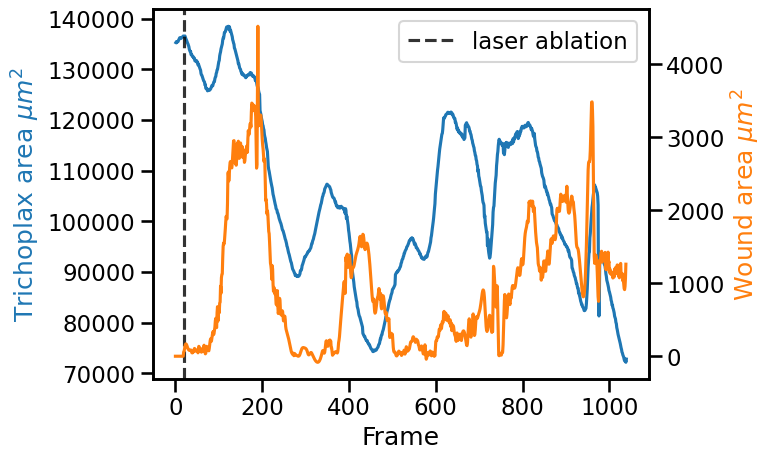

In [41]:
sns.set_context('talk')
fig,ax = plt.subplots()
ax2 = ax.twinx()

area_w = np.array((df_props_wound_correct.area.values))
area_o = np.array((df_props_correct.area.values))

sns.lineplot(x=df_props_correct.index.values,y = df_props_correct.area*(size_pixel)*(size_pixel),ax = ax,color='tab:blue')
sns.lineplot(x=df_props_wound_correct.index.values,y = df_props_wound_correct.area*(size_pixel)*(size_pixel), ax = ax2,color='tab:orange')
ax.set_ylabel('Trichoplax area $\mu m^2$',color = 'tab:blue')
ax2.set_ylabel('Wound area $\mu m^2$',color='tab:orange')
ax.set_xlabel('Frame')
ax.axvline(laser_frame,0,ax.get_ylim()[1],linestyle='--',color='black',alpha=0.8,label='laser ablation')
ax.legend()

plt.show()

## Ratio area wound/area organism

In [43]:
ratio = (area_w/area_o)

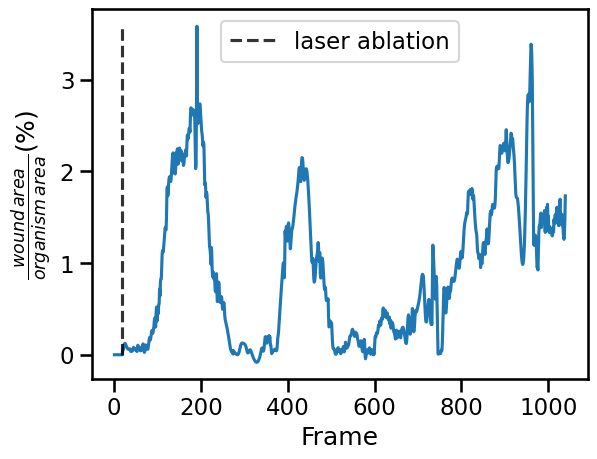

In [42]:
sns.lineplot(x = df_props.index.values,y = (area_w/area_o)*100)
plt.ylabel(r"$ \frac{wound\,area}{organism\,area}$" + '(%)')
plt.xlabel('Frame')
plt.vlines(laser_frame,0,max((area_w/area_o)*100),linestyle='--',color='black',alpha=0.8,label='laser ablation')
plt.legend()
plt.show()

In [46]:
df_test = df_props_correct.copy()

## Area organism

<AxesSubplot:ylabel='area'>

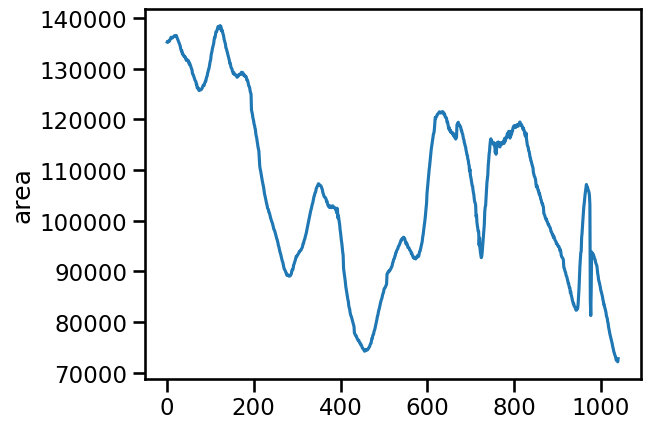

In [17]:
sns.lineplot(x=df_props_correct.index.values,y = df_props_correct.area*(size_pixel)*(size_pixel),color='tab:blue')

## Trajectory

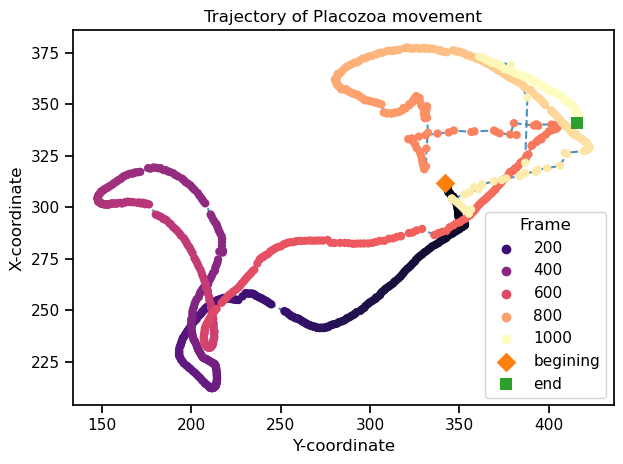

In [30]:
sns.set_context('notebook')

fig,ax = plt.subplots()

sns.scatterplot(x = df_props_correct['centroid-0'],y = df_props_correct['centroid-1'],marker="o"
                ,hue=df_props_correct.index,palette="magma",linewidth=0,ax=ax,hue_norm=(0,1000),zorder=1)

ax.scatter(x = df_props_correct['centroid-0'].values[0],y = df_props_correct['centroid-1'].values[0]
                ,marker="D",linewidth=0,label='begining',zorder=2,s=100)
ax.scatter(x = df_props_correct['centroid-0'].values[-1],y = df_props_correct['centroid-1'].values[-1]
                ,marker="s",linewidth=0,label='end',zorder=2,s=70)

ax.plot(df_props_correct['centroid-0'],df_props_correct['centroid-1'],linestyle='--',zorder=0,alpha=0.8)

plt.xlabel('Y-coordinate')
plt.ylabel('X-coordinate')
plt.title('Trajectory of Placozoa movement')
plt.legend(title='Frame')
plt.tight_layout()
plt.savefig('../data/results/figures/complete_pipeline/trajectory')
plt.show()

In [77]:
df_test['ratio'] = ratio*100

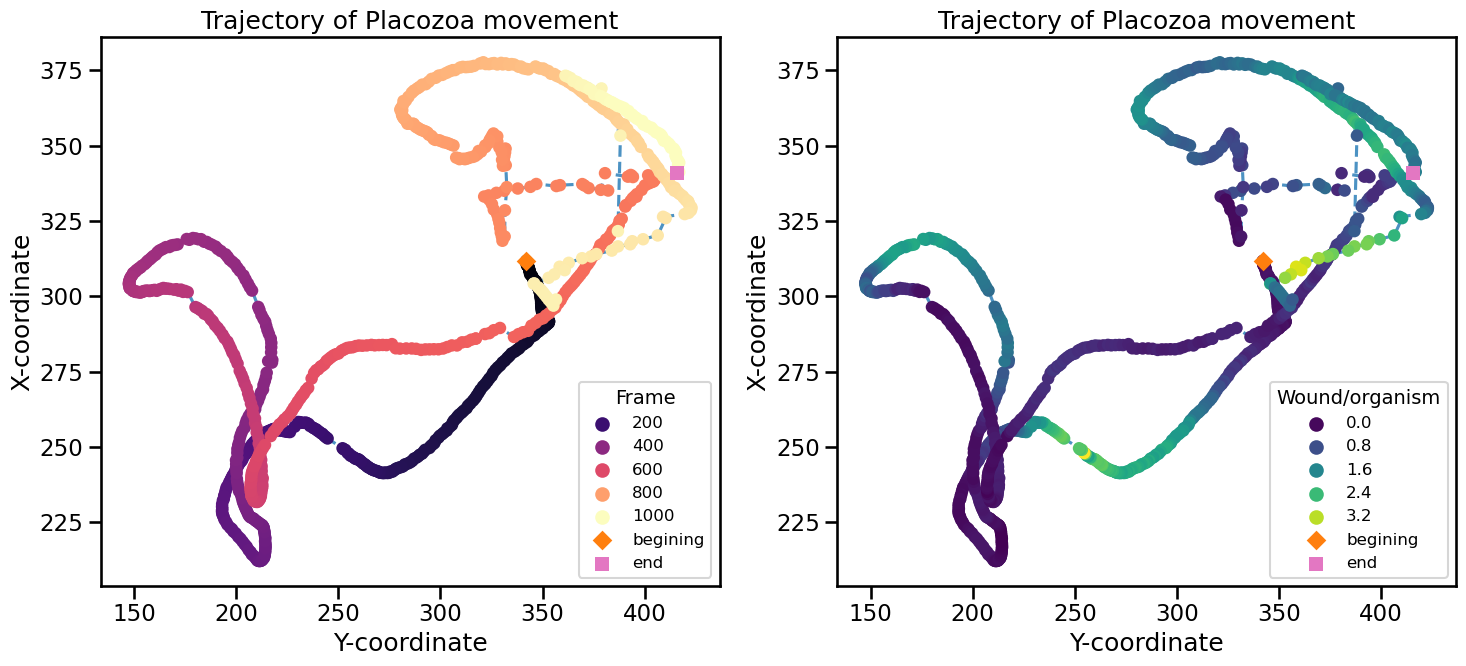

In [88]:
sns.set_context('talk')

fig,ax = plt.subplots(1,2,figsize=(15,7))

sns.scatterplot(x = df_props_correct['centroid-0'],y = df_props_correct['centroid-1'],marker="o"
                ,hue=df_props_correct.index,palette="magma",linewidth=0,ax=ax[0],hue_norm=(0,1000),zorder=1)

sns.scatterplot(x = df_test['centroid-0'],y = df_test['centroid-1'],marker="o"
                ,hue=df_test.ratio,palette="viridis",linewidth=0,ax=ax[1],zorder=1,hue_norm=(min(ratio*100),max(ratio*100)))

leg = ['Frame','Wound/organism']

for l,ax in enumerate(ax):
    
    ax.scatter(x = df_props_correct['centroid-0'].values[0],y = df_props_correct['centroid-1'].values[0]
                    ,marker="D",linewidth=0,zorder=2,s=100,label='begining')
    ax.scatter(x = df_props_correct['centroid-0'].values[-1],y = df_props_correct['centroid-1'].values[-1]
                    ,marker="s",linewidth=0,zorder=2,s=100,c="tab:pink",label='end')

    ax.plot(df_props_correct['centroid-0'],df_props_correct['centroid-1'],linestyle='--',zorder=0,alpha=0.8)

    ax.set_xlabel('Y-coordinate')
    ax.set_ylabel('X-coordinate')
    ax.set_title('Trajectory of Placozoa movement')
    ax.legend(title=leg[l],title_fontsize=14,fontsize=12)

plt.tight_layout()
plt.savefig('../data/results/figures/complete_pipeline/trajectory_wo_ratio.png',dpi=300)
plt.show()

In [102]:
df_props_wound_compare = pd.read_csv('../data/results/figures/complete_pipeline/props_wound_compare.csv')
df_props_pipeline_wound = pd.read_csv('../data/results/figures/complete_pipeline/props_wound_pipeline.csv')

In [106]:
df_props_pipeline_wound

,label,centroid-0,centroid-1,area,perimeter,eccentricity,orientation,axis_major_length,axis_minor_length,convexity
0,3,312.876289,230.804124,97,68.284271,0.869660,0.101149,548.546825,270.791007,15
1,4,360.459770,180.942529,87,67.248737,0.486166,0.611683,454.311054,397.007263,20
2,7,282.893617,180.398936,188,120.947222,0.898144,-0.324852,498.116284,219.021989,7
3,8,276.527778,206.555556,36,27.106602,0.967095,0.084372,476.242008,121.163523,29
4,9,277.434783,161.510870,92,71.112698,0.958843,-0.649229,661.080402,187.705891,17
...,...,...,...,...,...,...,...,...,...,...
542,1032,436.325515,248.358696,1748,368.776695,0.989334,-0.078892,235.870690,34.357664,2
543,1033,441.537297,246.545149,1783,401.060967,0.985385,-0.069071,219.857865,37.450955,1
544,1034,438.348033,247.100715,1678,402.339141,0.992557,-0.086537,257.905312,31.407563,1
545,1037,443.348607,244.565325,1615,381.060967,0.990875,-0.079173,239.729667,32.312076,1


In [118]:
df_props_wound_correct

,area,centroid-0,centroid-1,perimeter
0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
1034,1570.517703,440.613906,246.757752,382.391843
1035,1543.178468,444.774251,245.542366,374.430450
1036,1615.000000,443.348607,244.565325,381.060967
1037,1805.000000,428.856510,244.937396,404.889394


In [174]:
df_props_wound_compare

,label,centroid-0,centroid-1,area,perimeter,eccentricity,orientation,axis_major_length,axis_minor_length,convexity
0,2,299.023077,186.065385,260,183.053824,0.941723,-0.155774,620.030364,208.571980,6
1,3,333.657627,195.932203,295,223.781746,0.902218,-0.447054,568.898601,245.354393,5
2,4,300.476608,181.915205,342,239.344192,0.918266,-0.470694,564.507378,223.524658,5
3,5,317.173267,165.537129,404,274.965512,0.857559,-0.709551,565.653617,290.964457,5
4,9,296.717500,168.265000,800,513.002092,0.884954,-0.595991,600.126049,279.466000,2
...,...,...,...,...,...,...,...,...,...,...
434,1033,396.215738,252.367093,2656,690.618362,0.971695,-0.115279,363.165793,85.794487,1
435,1034,413.890590,249.109860,2221,599.582828,0.975916,-0.081480,346.208494,75.524272,1
436,1035,417.383383,253.136637,1998,532.872150,0.964509,-0.177501,343.334449,90.656901,2
437,1037,431.409870,248.818182,1925,513.114790,0.962897,-0.213730,283.374913,76.474463,2


In [198]:
df_props_pipeline_wound

,label,centroid-0,centroid-1,area,perimeter,eccentricity,orientation,axis_major_length,axis_minor_length,convexity
0,3,312.876289,230.804124,97,68.284271,0.869660,0.101149,548.546825,270.791007,15
1,4,360.459770,180.942529,87,67.248737,0.486166,0.611683,454.311054,397.007263,20
2,7,282.893617,180.398936,188,120.947222,0.898144,-0.324852,498.116284,219.021989,7
3,8,276.527778,206.555556,36,27.106602,0.967095,0.084372,476.242008,121.163523,29
4,9,277.434783,161.510870,92,71.112698,0.958843,-0.649229,661.080402,187.705891,17
...,...,...,...,...,...,...,...,...,...,...
542,1032,436.325515,248.358696,1748,368.776695,0.989334,-0.078892,235.870690,34.357664,2
543,1033,441.537297,246.545149,1783,401.060967,0.985385,-0.069071,219.857865,37.450955,1
544,1034,438.348033,247.100715,1678,402.339141,0.992557,-0.086537,257.905312,31.407563,1
545,1037,443.348607,244.565325,1615,381.060967,0.990875,-0.079173,239.729667,32.312076,1


In [194]:
df_wound_wpompare_interpolated = pi.interpolate_wound(df_props_pipeline_wound,df_props_wound_correct
                                                      ,19,names = ['area','centroid-0','centroid-1','perimeter'],degree= 3)[0]


In [231]:
def interpolate_wound(df_wound,df_org,laser,names = ['area','centroid-0','centroid-1','perimeter'],degree= 3):
    '''
    Parameters
    ----------
    df_wound : Dataframe
        Dataframe containing the wound properties
    df_org : Dataframe
        Dataframe containing the organism properties.
    laser : int
        plane where there is the laser.
    names : list, optional
        the list of the columns you want to interpolate. The default is ['area','centroid-0','centroid-1','perimeter'].

    Returns
    -------
    dft_n : Dataframe
        Dataframe containing the interpolated values for the columns selected.
    '''
    
    x = df_wound.label.values
    time_wound = len(df_wound.index.values)
    real_x = list(df_org.index.values)

    res = []

    for i in names:
        y = df_wound[i].values   #gather the values
        spl = InterpolatedUnivariateSpline(x, y ,k=degree) #compute the interpolation function
        res.append(spl(real_x)) #append the interpolated values to list 
    
    dft_n = pd.DataFrame(res).T
    dft_n = dft_n.set_axis(names,copy = False , axis=1)
    
    for i in dft_n.index.values: # replace the values before the laser by 0 (there should not be a wound before)
        if i < laser:
            dft_n.loc[i,:] = 0

    return dft_n,time_wound

from scipy.interpolate import InterpolatedUnivariateSpline


In [236]:
df_wound_compare_interp = interpolate_wound(df_props_wound_compare,df_props_wound_correct,19)[0]

In [235]:
missing_planes_pipeline = [x for x in df_props_wound_correct.index.values if x not in df_props_pipeline_wound.label.values]
missing_planes_raw = [x for x in df_props_wound_correct.index.values if x not in df_props_wound_compare.label.values]

In [251]:
import matplotlib 

font = {'weight' : 'normal',
        'size'   : 25}

matplotlib.rc('font', **font)

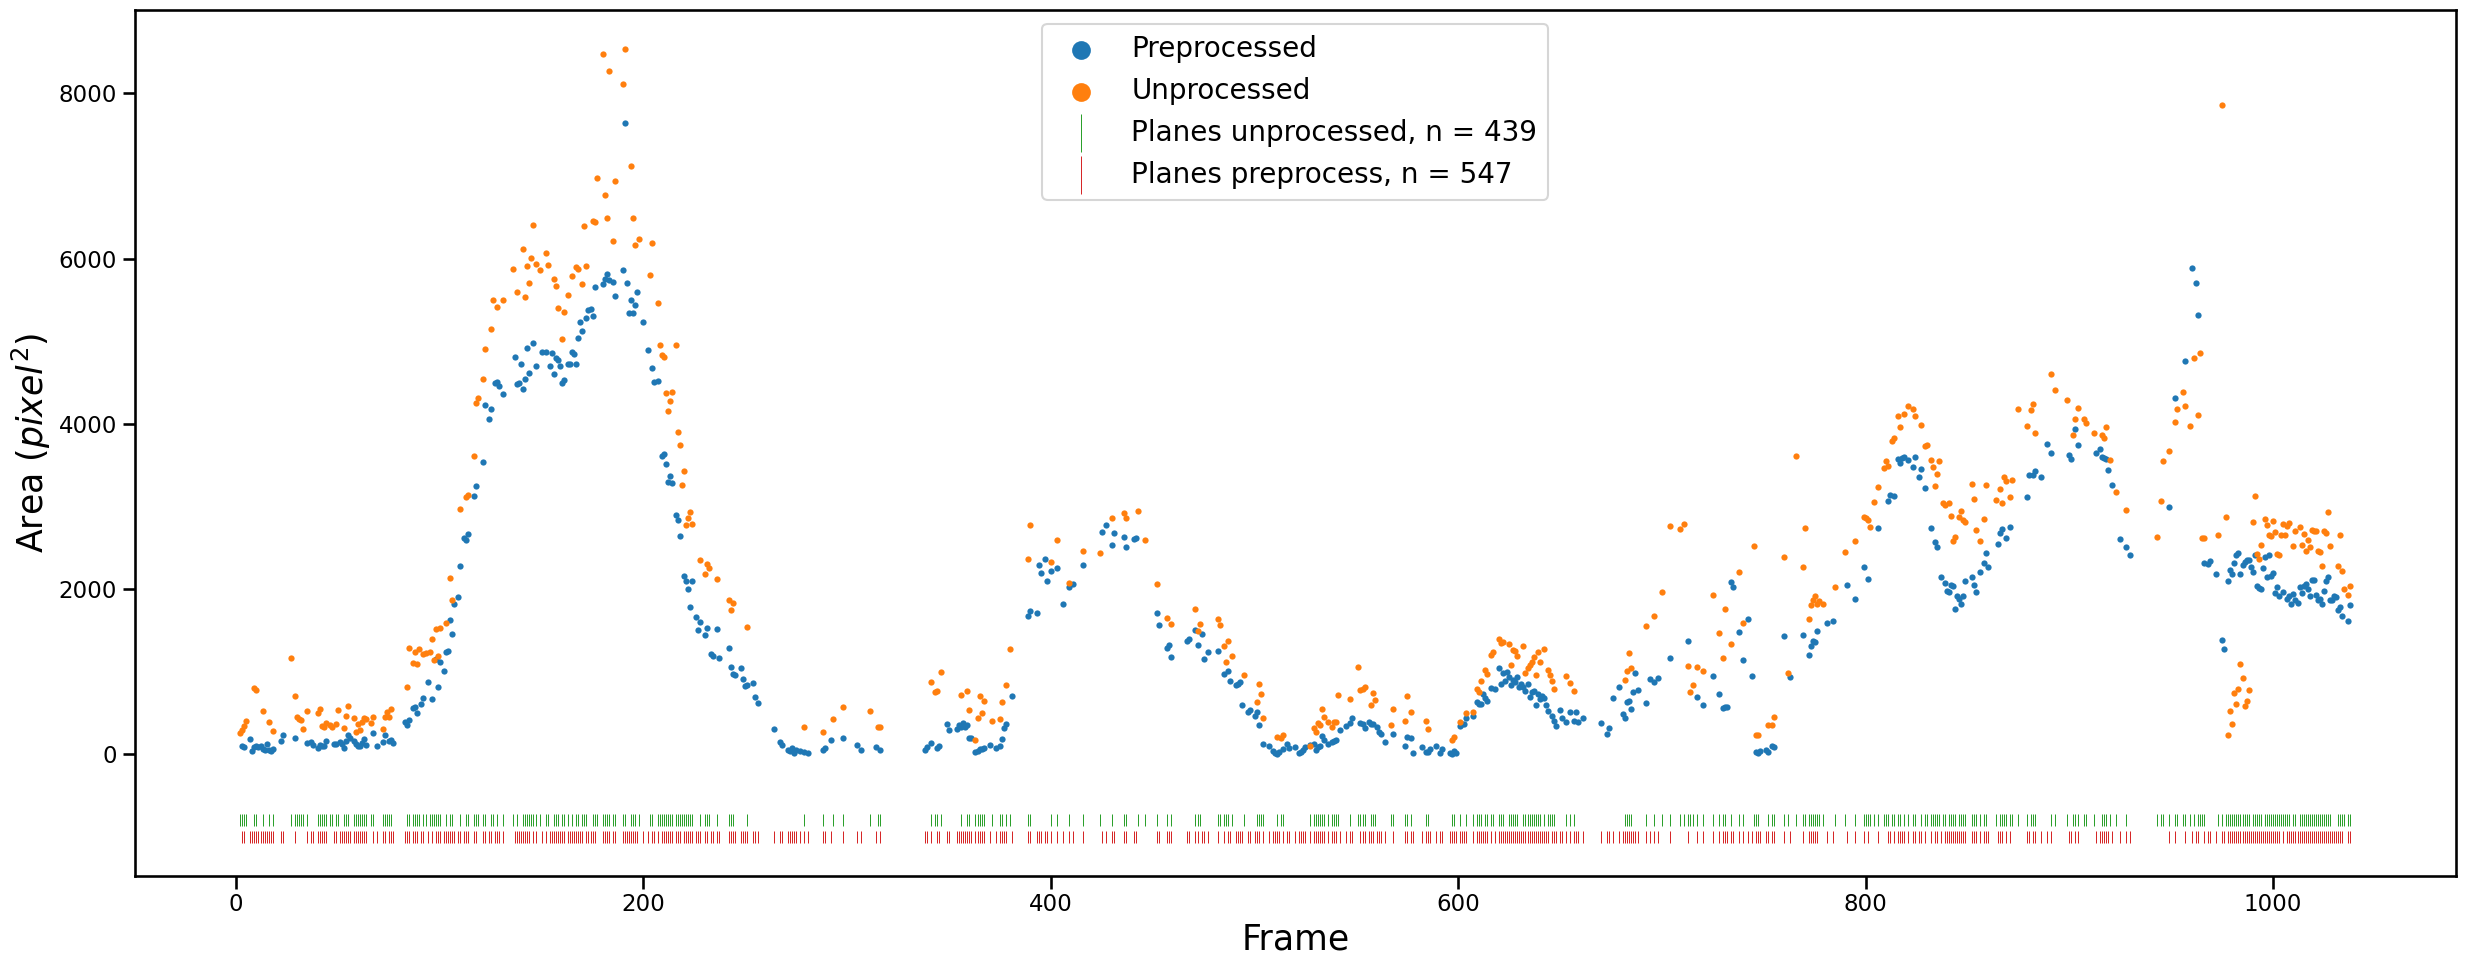

In [263]:
fig,ax = plt.subplots(figsize=(25,10))
sns.set_context('talk')


sns.scatterplot(x = df_props_pipeline_wound.label.values,y = df_props_pipeline_wound.area,marker = '.'
                ,linewidth = 0,ax =ax,label='Preprocessed',zorder=1)

sns.scatterplot(x = df_props_wound_compare.label.values,y = df_props_wound_compare.area,marker = '.'
                ,linewidth = 0,ax =ax,label='Unprocessed',zorder=1)


#sns.lineplot(x = df_props_wound_correct.index.values,y=df_props_wound_correct.area.values,linestyle='--',alpha=0.6,zorder=0)
#sns.lineplot(x = df_wound_compare_interp.index.values,y=df_wound_compare_interp.area.values,linestyle='--',alpha=0.6,zorder=0)


sns.scatterplot(x = df_props_wound_compare.label.values , y = -800,marker='|'
                ,label=f'Planes unprocessed, n = {len(df_props_wound_compare.label.values)}')#,linewidth = 0)

sns.scatterplot(x = df_props_pipeline_wound.label.values , y = -1000,marker='|'
                ,label=f'Planes preprocess, n = {len(df_props_pipeline_wound.label.values)}')#,linewidth = 0)


plt.legend(fontsize=20,markerscale=3)
plt.ylabel('Area $(pixel^2)$',fontsize=25)
plt.xlabel('Frame',fontsize=25)
#plt.hlines(-1200,0,1040,linestyle='--')
#plt.xlim(600,800)
plt.tight_layout()
plt.savefig('../data/results/figures/complete_pipeline/effect_interpolation.png',dpi=300)

plt.show()

In [ ]:
end = time.time() - start
print(f'The whole pipeline took {end/60:.2f} minutes to complete')

# Saving the images and dataframes

## Saving the preprocessed image

In [ ]:
path_preprocessed = r"D:\Lab2\data_tif\results\preprocesed_19102022_16h02.tif"
imwrite(path_preprocessed,preprocessed)

## Saving the mask

In [ ]:
path_mask = '../data/new_movies/results/mask/preprocesed_19102022_16h02_mask.tif'
imwrite(path_mask,mask)

## Saving the dataframes

In [ ]:
path_props= ''
path_props_wound = ''

df_props_correct.tocsv(path_props)
df_props_wound_correct.tocsv(path_props_wound)

# Optional : visualizing the drift

In [ ]:
canva,diffx,diffy = pi.create_canva(df_drift,preprocessed)

rescaled = pi.place_img(canva,diffx,diffy,preprocessed,df_drift,res)

## Saving the canva

In [ ]:
path_canva = '../data/tricho_8_wound_drift_visualization.tif'
imwrite(path_canva,rescaled,compression='zlib') #adding compression to reduce file size